<a href="https://colab.research.google.com/github/robitussin/CCDATS1L_EXERCISES/blob/main/exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

Visualing the titanic data set

One of the classic public datasets used to demonstrate binary classification is the titanic dataset which lists 891 of the the passengers aboard the RMS Titanic when it sank on April 15, 1912.

The dataset includes the name of each passenger as well as other information such as the fare class, the fare price, the person's age and gender, and whether that person survived the sinking of the ship.


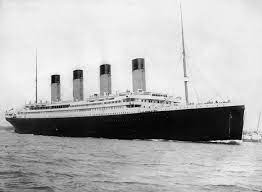

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from seaborn import load_dataset


In [58]:
df = load_dataset("titanic")

In [59]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [62]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [63]:
df.drop(['deck'], axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [64]:
survived_count = df.groupby('survived')['survived'].count()
survived_count

survived
0    549
1    342
Name: survived, dtype: int64

#### 1. Using `plt.hist()`, display the distribution of ages of all the passengers who were aboard in the titanic

- the horizontal x-axis should be  from 0-80 years old
- the vertical y-axis should be from 0-40 years old

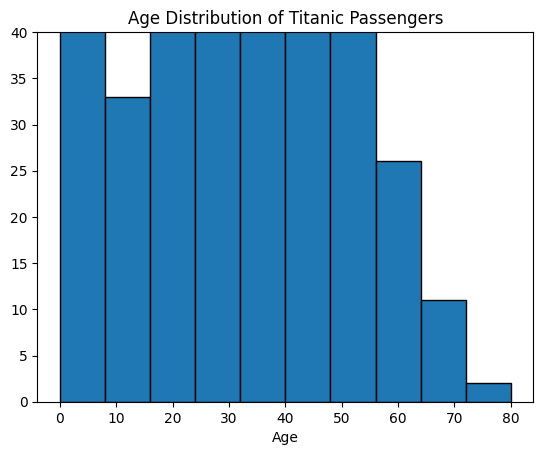

In [65]:
# put your answer here

x_range = (0, 80)

plt.hist(df.age, range=x_range, edgecolor='k')
plt.xlabel('Age')
plt.title('Age Distribution of Titanic Passengers')
plt.ylim(0, 40)

plt.show()

#### 2. Using the survived count variable, use `plt.bar()` to create a barplot to display the number of people who **survived** and **did not survive**.

- the horizontal x-axis should have two bars, **not survived** and **survived**
- the vertical y-axis should be the number of passengers who survived and did not survive

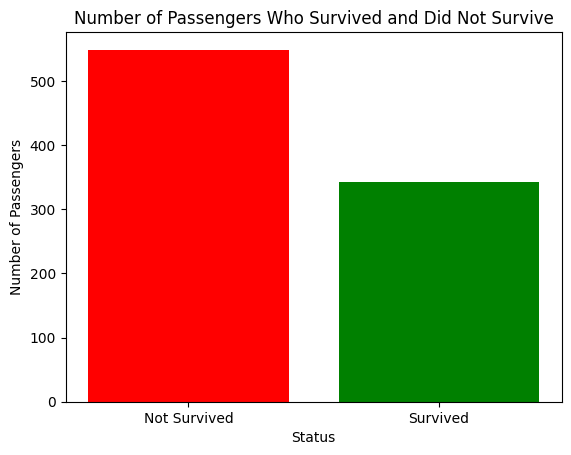

In [66]:
# put your answer here
categories = ['Not Survived', 'Survived']

counts = survived_count.values

plt.bar(categories, counts, color=['red', 'green'])

plt.xlabel('Status')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Who Survived and Did Not Survive')

plt.show()

In [67]:
pclass_count = df.groupby('pclass')['pclass'].count()
pclass_count

pclass
1    216
2    184
3    491
Name: pclass, dtype: int64

#### 3. Using the **pclass_count** variable, use `plt.pie()` to create a piechart to display the percentage of passengers who are in **class 1**, **class 2** and **class 3**

- The pie chart should have three labels, class 1, class 2 and class 3.

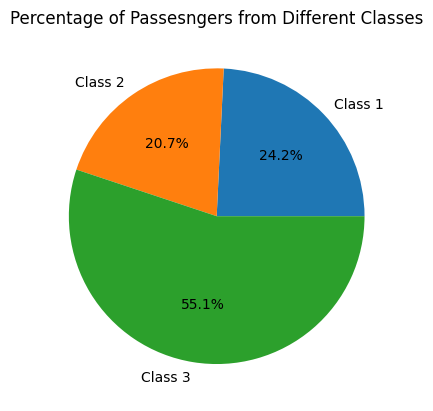

In [68]:
# put your answer here
counts = pclass_count.values
pie_classes= ["Class 1", "Class 2", "Class 3"]

plt.pie(counts, labels = pie_classes, autopct='%1.1f%%')
plt.title('Percentage of Passesngers from Different Classes')
plt.show() 

In [69]:
sex_count = df.groupby('sex')['sex'].count()
sex_count

sex
female    314
male      577
Name: sex, dtype: int64

#### 4. Using the **sex_count** variable, use `plt.pie()` to create a piechart to display the percentage of passengers who are **male** and **female**

- The pie chart should have two labels, **male** and **female**.

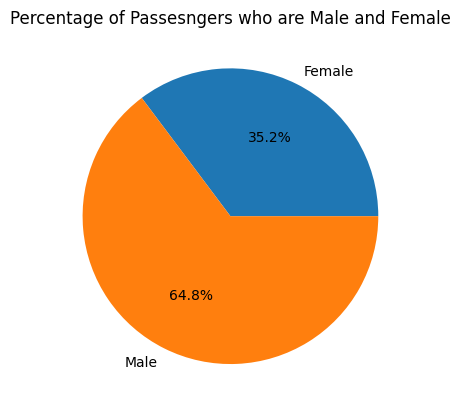

In [70]:
# put your answer here
counts = sex_count.values
pie_classes= ["Female", "Male"]

plt.pie(counts, labels = pie_classes, autopct='%1.1f%%')
plt.title('Percentage of Passesngers who are Male and Female')
plt.show() 

In [71]:
embark_count = df.groupby('embark_town')['embark_town'].count()
embark_count

embark_town
Cherbourg      168
Queenstown      77
Southampton    644
Name: embark_town, dtype: int64

#### 5. Using the **embark_count** variable, use `plt.pie()` to create a piechart to display the percentage of passengers who came from **Cherbourg**, **Queenstown** and **Southampton**

- The pie chart should have three labels, **Cherbourg**, **Queenstown** and **Southampton**.

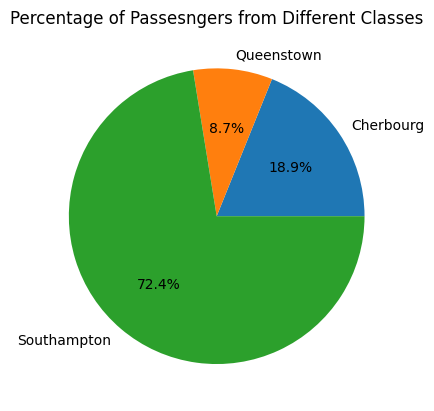

In [72]:
# put your answer here

counts = embark_count.values
pie_classes= ["Cherbourg", "Queenstown", "Southampton"]

plt.pie(counts, labels = pie_classes, autopct='%1.1f%%')
plt.title('Percentage of Passesngers from Different Classes')
plt.show() 

In [73]:
survived_sex = df.groupby('sex')['survived'].sum()
survived_sex

sex
female    233
male      109
Name: survived, dtype: int64

#### 6. Using the **survived_sex** variable, use `plt.bar()` to create a barchart to display the number of male and female survivors.

- the horizontal x-axis should have two bars, **male** and **female**
- the vertical y-axis should be the number of survivors who are either male or female.

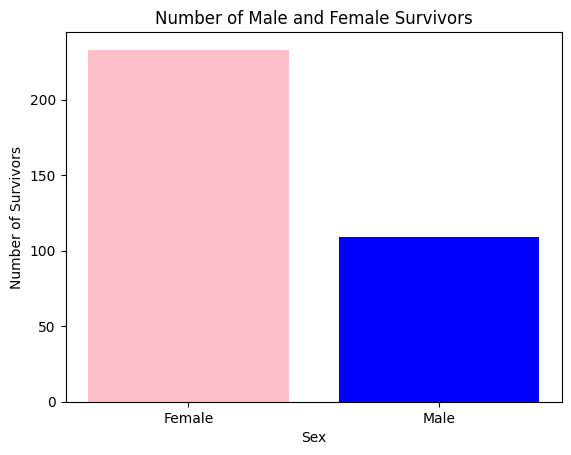

In [74]:
# put your answer here
categories = ['Female', 'Male']


counts = survived_sex.values


plt.bar(categories, counts, color=['pink', 'blue'])

plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.title('Number of Male and Female Survivors')

plt.show()